In [1]:
import numpy as np
import pandas as pd
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from google.cloud import bigquery
from bq_helper import BigQueryHelper
%load_ext google.cloud.bigquery
import os
%matplotlib inline


# For visualization
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6, brewer
from bokeh.transform import factor_cmap

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="My Project-bbdce7b1712b.json"

bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")


# ANALYZE ONLY FROM JAN 2003 TO DEC 2017

# Analyze CO Daily

In [2]:

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_CO
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_co_Daily=bq_assistant.query_to_pandas(query)

In [3]:
## Reference https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
df_co_Daily['date_local'] =  pd.to_datetime(df_co_Daily['date_local'], format='%Y-%m-%d')
##df['Date'].dt.strftime('%Y%m%d')


In [4]:
df_co_Daily=df_co_Daily[df_co_Daily['date_local']>='2003-01-01']

In [5]:
df_co_Daily.set_index('date_local',inplace=True)

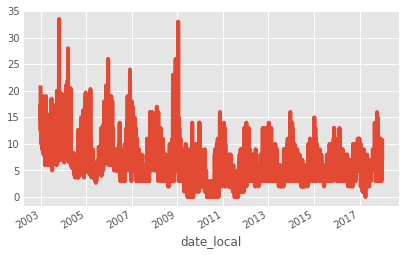

In [6]:
from matplotlib import style
style.use('ggplot')

df_co_Daily['avg_aqi_CO'].plot()

In [7]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_co_Daily['100ma_for_CO'] = df_co_Daily['avg_aqi_CO'].rolling(window=100,min_periods=0).mean()
df_co_Daily.round(2)

,avg_aqi_CO,100ma_for_CO
date_local,,
2003-01-01,21.0,21.00
2003-01-02,12.5,16.75
2003-01-03,16.5,16.67
2003-01-04,17.0,16.75
2003-01-05,17.5,16.90
2003-01-06,16.0,16.75
2003-01-07,14.0,16.36
2003-01-08,15.5,16.25
2003-01-09,14.5,16.06


In [8]:
# ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1,)
# ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# ax1.plot(df_co_Daily.index, df_co_Daily['avg_aqi_CO'])
# ax1.plot(df_co_Daily.index, df_co_Daily['100ma'])

# plt.show()

# Analyze Ozone Daily

In [9]:

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_O3
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_o3_Daily=bq_assistant.query_to_pandas(query)
df_o3_Daily['date_local'] =  pd.to_datetime(df_o3_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_o3_Daily=df_o3_Daily[df_o3_Daily['date_local']>='2003-01-01']

df_o3_Daily.set_index('date_local',inplace=True)

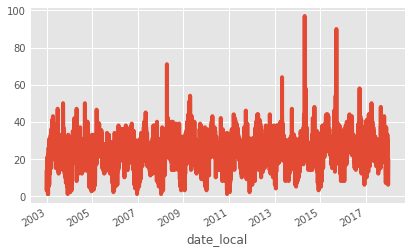

In [10]:
from matplotlib import style
style.use('ggplot')

df_o3_Daily['avg_aqi_O3'].plot()

In [11]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_o3_Daily['100ma_for_Ozone'] = df_o3_Daily['avg_aqi_O3'].rolling(window=100,min_periods=0).mean()
df_o3_Daily.round(2)

,avg_aqi_O3,100ma_for_Ozone
date_local,,
2003-01-01,14.0,14.00
2003-01-02,3.0,8.50
2003-01-03,5.0,7.33
2003-01-04,8.0,7.50
2003-01-05,13.0,8.60
2003-01-06,14.0,9.50
2003-01-07,6.0,9.00
2003-01-08,3.0,8.25
2003-01-09,11.0,8.56


# Analyze Nitrogen Dioxide Daily


In [12]:


query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_NO2
    FROM
      `bigquery-public-data.epa_historical_air_quality.no2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_no2_Daily=bq_assistant.query_to_pandas(query)
df_no2_Daily['date_local'] =  pd.to_datetime(df_no2_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_no2_Daily=df_no2_Daily[df_no2_Daily['date_local']>='2003-01-01']

df_no2_Daily.set_index('date_local',inplace=True)

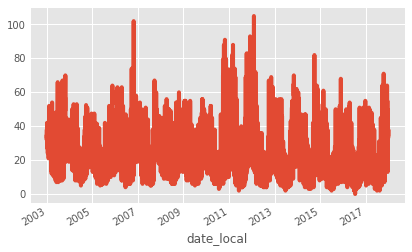

In [13]:
from matplotlib import style
style.use('ggplot')

df_no2_Daily['avg_aqi_NO2'].plot()

In [14]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_no2_Daily['100ma_for_Nitrogen_Dioxide'] = df_no2_Daily['avg_aqi_NO2'].rolling(window=100,min_periods=0).mean()
df_no2_Daily.round(2)

,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide
date_local,,
2003-01-01,35.0,35.00
2003-01-02,32.0,33.50
2003-01-03,37.0,34.67
2003-01-04,38.0,35.50
2003-01-05,33.0,35.00
2003-01-06,40.0,35.83
2003-01-07,42.0,36.71
2003-01-08,39.0,37.00
2003-01-09,35.0,36.78


# Analyze Sulphur Dioxide Daily

,avg_aqi_SO2,100ma_for_Sulphur_Dioxide
date_local,,
2003-01-01,6.0,6.00
2003-01-02,10.0,8.00
2003-01-03,11.0,9.00
2003-01-04,9.0,9.00
2003-01-05,14.0,10.00
2003-01-06,33.0,13.83
2003-01-07,9.0,13.14
2003-01-08,10.0,12.75
2003-01-09,11.0,12.56


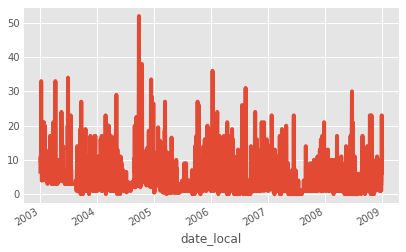

In [15]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_SO2
    FROM
      `bigquery-public-data.epa_historical_air_quality.so2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_so2_Daily=bq_assistant.query_to_pandas(query)
df_so2_Daily['date_local'] =  pd.to_datetime(df_so2_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_so2_Daily=df_so2_Daily[df_so2_Daily['date_local']>='2003-01-01']
df_so2_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_so2_Daily['avg_aqi_SO2'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_so2_Daily['100ma_for_Sulphur_Dioxide'] = df_so2_Daily['avg_aqi_SO2'].rolling(window=100,min_periods=0).mean()
df_so2_Daily.round(2)

# Analyze Particulate Matter Daily

,avg_aqi_pm25,100ma_for_PM25
date_local,,
2003-01-01,65.0,65.00
2003-01-02,64.0,64.50
2003-01-03,61.0,63.33
2003-01-04,60.0,62.50
2003-01-05,70.0,64.00
2003-01-06,36.0,59.33
2003-01-07,93.0,64.14
2003-01-08,104.0,69.12
2003-01-09,95.0,72.00


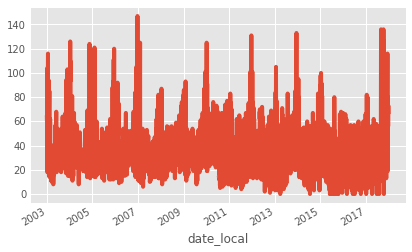

In [16]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_pm25
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_pm25_Daily=bq_assistant.query_to_pandas(query)
df_pm25_Daily['date_local'] =  pd.to_datetime(df_pm25_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_pm25_Daily=df_pm25_Daily[df_pm25_Daily['date_local']>='2003-01-01']
df_pm25_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_pm25_Daily['avg_aqi_pm25'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_pm25_Daily['100ma_for_PM25'] = df_pm25_Daily['avg_aqi_pm25'].rolling(window=100,min_periods=0).mean()
df_pm25_Daily.round(2)

# Analyze SF Crime Daily

In [17]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT CAST(timestamp AS DATE) as date_local,count(distinct unique_key) as no_of_incidents
FROM `bigquery-public-data.san_francisco.sfpd_incidents`
group by date_local
order by date_local asc
"""

df_sfcrimes_Daily=bq_assistant.query_to_pandas(query)


In [18]:
df_sfcrimes_Daily['date_local'] =  pd.to_datetime(df_sfcrimes_Daily['date_local'], format='%Y-%m-%d')
df_sfcrimes_Daily=df_sfcrimes_Daily[df_sfcrimes_Daily['date_local']<='2017-12-31']


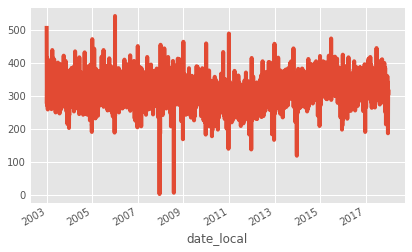

In [19]:
df_sfcrimes_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_sfcrimes_Daily['no_of_incidents'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
# df_sfcrimes_Daily['100ma_for_No_of_Incidents'] = df_sfcrimes_Daily['no_of_incidents'].rolling(window=100,min_periods=0).mean()
# df_sfcrimes_Daily.round(2)

In [20]:
df_sfcrimes_Daily

,no_of_incidents
date_local,
2003-01-01,511
2003-01-02,321
2003-01-03,368
2003-01-04,276
2003-01-05,290
2003-01-06,323
2003-01-07,331
2003-01-08,415
2003-01-09,344


In [21]:
df_co_Daily.shape

(5476, 2)

In [22]:
df_o3_Daily.shape

(5472, 2)

In [23]:
df_no2_Daily.shape

(5465, 2)

In [24]:
df_pm25_Daily.shape

(4153, 2)

In [25]:
df_sfcrimes_Daily.shape

(5478, 1)

In [26]:
## Combine the dataframes ie all
from functools import reduce

df_co_Daily.reset_index(inplace=True)
df_o3_Daily.reset_index(inplace=True)
df_no2_Daily.reset_index(inplace=True)
df_pm25_Daily.reset_index(inplace=True)
df_sfcrimes_Daily.reset_index(inplace=True)

## Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
frames=[df_co_Daily,df_o3_Daily,df_no2_Daily,df_sfcrimes_Daily,df_pm25_Daily]
df_final = reduce(lambda left,right: pd.merge(left,right,on='date_local'), frames)


In [27]:
df_final.columns

Index(['date_local', 'avg_aqi_CO', '100ma_for_CO', 'avg_aqi_O3',
       '100ma_for_Ozone', 'avg_aqi_NO2', '100ma_for_Nitrogen_Dioxide',
       'no_of_incidents', 'avg_aqi_pm25', '100ma_for_PM25'],
      dtype='object')

In [28]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')
df_final["avg_aqi_pm25"]=imp.fit_transform(df_final[["avg_aqi_pm25"]]).ravel()

In [29]:
## Optional MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']] = MinMaxScaler().fit_transform(df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']])


# Regression

In [30]:
# Log transform the target for official scoring
# REFER https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
df_final.no_of_incidents = np.log1p(df_final.no_of_incidents)

In [31]:
X=df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']]

In [32]:
Y=df_final['no_of_incidents']

Index(['avg_aqi_CO', 'avg_aqi_O3', 'avg_aqi_pm25', 'avg_aqi_NO2'], dtype='object')

In [34]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        no_of_incidents   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 2.005e+04
Date:                Fri, 23 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:31:39   Log-Likelihood:                -6862.4
No. Observations:                4139   AIC:                         1.373e+04
Df Residuals:                    4135   BIC:                         1.376e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
avg_aqi_CO       4.7037      0.234     20.132      0.000       4.246       5.162
avg_aqi_O3      13.3603      0.130    102.869      0.000      13.106      13.615
avg_aqi_pm25     4.3692      0.156     27.981      0.000       4.063       4.675
avg_aqi_NO2      0.9502      0.188      5.046      0.000       0.581       1.319
==============================================================================
Omnibus:                      616.069   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2541.787
Skew:                          -0.681   Prob(JB):                         0.00
Kurtosis:                       6.589   Cond. No.                         6.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

predictions = lm.predict(X)
print('Accuracy of model=',lm.score(X,Y))


Accuracy of model= 0.0322340282302046


In [36]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(2897, 4) (2897,)
(1242, 4) (1242,)


In [37]:
# Linear Models

## 1. Linear Regression

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

from sklearn import metrics
                               
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))


mods=['Linear_Regression']
vals=[]
## Vals contains rmse for test set
vals.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.17997385992251275


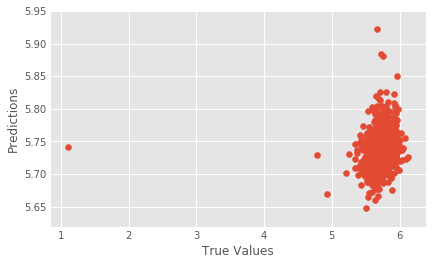

In [38]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## R2 score Evaluation
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)


In [39]:

from sklearn.metrics import r2_score
from sklearn import metrics

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))

print('Rmse VAlue is:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


r2 train: 0.035, test : 0.026
Rmse VAlue is:
0.17997385992251275


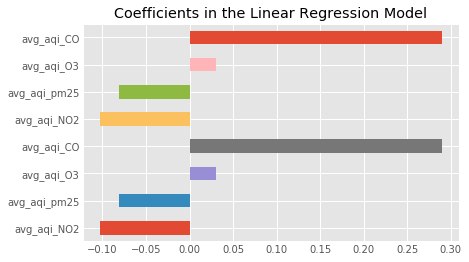

In [40]:

# Feature Importance in Linear Regression

coefs = pd.Series(model.coef_, index = X_train.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Linear Regression Model")
plt.show()


In [ ]:
 
## 2. Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=324)

regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

# make predictions on the testing set
y_pred = regressor.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## R2 score Evaluation
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)

from sklearn.metrics import r2_score

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))

mods.append('Decision_Tree_Regressor')
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

coefs = pd.Series(regressor.feature_importances_, index = X_train.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Decision Tree Regression Model")
plt.show()



# Regularized Linear Models

## Reference https://www.kaggle.com/apapiu/regularized-linear-models

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


# cv_lasso

# model_lasso = Lasso(alpha=cv_lasso.idxmin)
# model_lasso.fit(X_train, y_train)
# # rmse_cv_test(model_lasso).mean()




In [ ]:
## 3. Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

forest=RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)

# make predictions on the testing set
y_pred = forest.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


## R2 score Evaluation
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

from sklearn.metrics import r2_score

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))

mods.append('Random Forest Regressor')
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



In [ ]:
coefs = pd.Series(forest.feature_importances_, index = X_train.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Random Forest Regression Model")
plt.show()


In [ ]:
## 1. Ridge Regression

model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv_test(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge.min()

mods.append('Ridge Regressor')
vals.append(cv_ridge.min())

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model_ridge=RidgeCV(alphas=alphas)
model_ridge.fit(X_train, y_train)
rmse_cv_test(model_ridge).mean()

coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")


# 2. Lasso Regression

model_lasso = LassoCV()
alphas = [1, 0.1, 0.001, 0.0005]
cv_lasso = [rmse_cv_test(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
mods.append('Lasso Regressor')
vals.append(rmse_cv_train(model_lasso).min())

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model_lasso=RidgeCV(alphas=alphas)
model_lasso.fit(X_train, y_train)
rmse_cv_test(model_lasso).mean()

coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


In [ ]:

ser_df=pd.DataFrame({'Model': mods, 'Accuracy_Value': vals})

source = ColumnDataSource(ser_df)

p = figure(x_range=mods, plot_width=900, plot_height=500)
color_map = factor_cmap(field_name='Model', palette=Spectral6, factors=mods)
p.vbar(x='Model', top='Accuracy_Value', source=source, width=0.70, color=color_map)

p.title.text ='Comparison of Models'
p.xaxis.axis_label = 'Model Types'
p.yaxis.axis_label = "RMSE value of different models On Test Set"

show(p)